In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, "../src")
from custom_plots import *

In [43]:
performance = {
    "XG Boost": 0.7951,
    "K-Nearest Neighbors": 0.5447,
    "Random Forest": 0.4753,
    "Decision Tree": 0.4162,
    "Logistic Regression": 0.3942,
    "Ada Boost": 0.3880,
    "Gaussian / Bayesian": 0.2415,
}

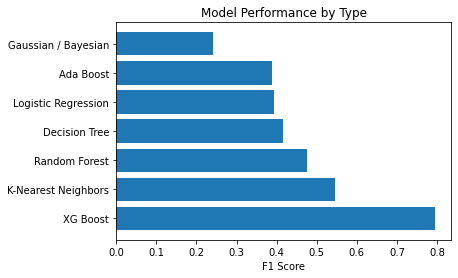

In [44]:
plt.figure()
plt.barh(list(performance.keys()), list(performance.values()))
plt.title("Model Performance by Type")
plt.xlabel("F1 Score")
plt.savefig("../images/model_performance_by_type.png", bbox_inches="tight")

In [47]:
# Print metrics
prediction = model_xgb.predict(x_test)
print_scores(prediction, y_test)

NameError: name 'x_test' is not defined

In [46]:
def produce_shap_plot(
    df_train, target_train, df_test, target_test, model_shap, title=None, savepath=None
):
    df_train, target_train, df_test = get_shap_df(df_train, target_train, df_test)
    model_shap = model_shap.steps[2][1]
    model_shap.fit(df_train, target_train)
    pred = model_shap.predict(df_test)

    # Produce shap values
    explainer = shap.TreeExplainer(model_shap)
    shap_values = explainer.shap_values(df_test)

    # Plot findings
    plt.figure()
    shap.summary_plot(
        shap_values, df_test, show=False, plot_size=(12, 8), max_display=12
    )

    # Add figure title if provided by user
    if title:
        plt.title(title, fontsize=16)

    if savepath:
        plt.savefig(savepath, bbox_inches="tight")

    plt.show()


with open("../data/processed/model_xgb.pickle", "rb") as f:
    model_xgb = pickle.load(f)


renamer = {
    "xconst": "executive_constraints",
    "protestnumber_log": "protests_year_prior",
    "tensys_strict": "duration_of_govt_type",
    "yrsoffc": "duration_of_exec_tenure",
    "totalseats": "seats_in_govt",
    "maj": "margin_of_majority",
    "numvote": "vote_share_leaders",
    "participants": "protest_participant_ct",
    "herfgov": "herfindahl_index",
    "gq": "gender_quota",
    "legelec": "election_this_yr",
}
x_train_renamed = x_train.rename(renamer, axis=1)
x_test_renamed = x_test.rename(renamer, axis=1)
model_xgb.fit(x_train_renamed, y_train)

produce_shap_plot(
    x_train_renamed,
    y_train,
    x_test_renamed,
    y_test,
    clone(model_xgb),
    title="Feature Importance",
    savepath="../images/shap_summary_plot_renamed.png",
);


# shap.summary_plot(shap_values, df_test, show=False, plot_size=(16, 12))

NameError: name 'x_train' is not defined